In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from Graph import Graph
import networkx as nx
from wordcloud import WordCloud
import itertools


data = pd.read_csv('../Datasets/StackOverflowData.csv')
data_nodes = pd.read_csv('../Datasets/StackOverflowNodes.csv')
data.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [2]:
df_nodes = data['source'].unique().tolist()
df_edges = pd.read_csv('../Datasets/StackOverflowData.csv')
graph = {key: [] for key in df_nodes}
for node_1, node_2, value in df_edges.values.tolist():
    graph[node_1].append({'node': node_2, 'value': value})

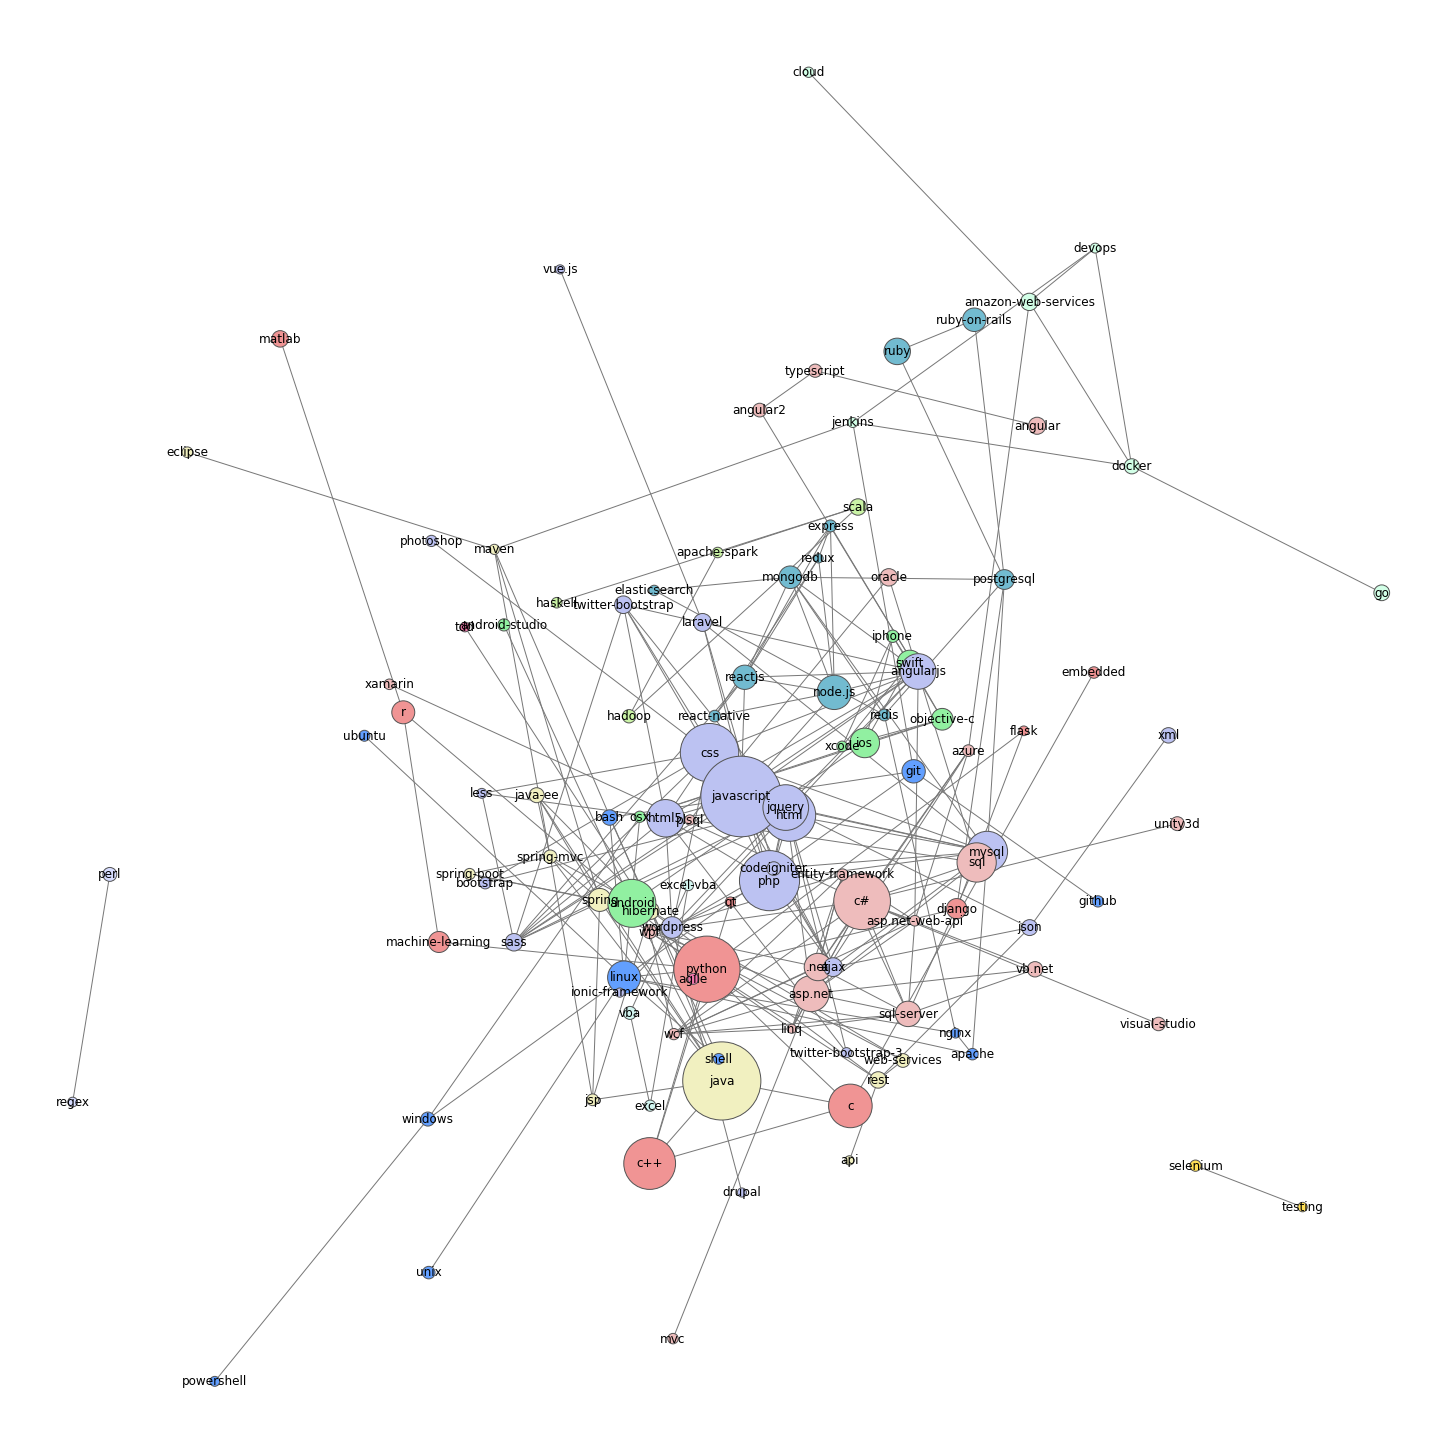

In [3]:
G = nx.Graph(day="Stackoverflow")
for index, row in data_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in data.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'}

plt.figure(figsize=(20,20))
options = {
    'edge_color': '#787878',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
    'font_size': 12,
}
colors = [color_map[G.nodes[node]['group']] for node in G]
G.nodes['html']
sizes = [G.nodes[node]['nodesize']*10 for node in G]

nx.draw(G, node_size=sizes, node_color=colors, pos=nx.spring_layout(G, k=0.25, iterations=5), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()

## Nuvem de Assuntos

Abaixo está representada uma lista de assuntos comentados no Stack Overflow para que se possa utilizar o exemplo que vem a seguir.

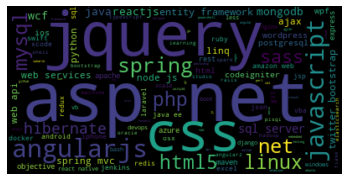

In [4]:
subject = data.source.values
wc = WordCloud().generate(str(subject).replace('\'', ''))

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## BFS para busca de conexões com uma assunto específico

Insira abaixo o nome do assunto que deseja procurar correlações:

In [5]:
target = input()

c


In [6]:
result_graph = nx.Graph()
def BFS(G, target):
    visited = []
    queue = []
    queue.append(target)
    visited.append(target)
    layer = 0
    while queue:
        u = queue.pop(0)
        result_graph.add_node(u, group=layer, nodesize=10)
        layer += 1
        for v in G[u]:
            if v['node'] not in visited:
                queue.append(v['node'])
                visited.append(v['node'])
                result_graph.add_edge(u, v['node'])

In [7]:
BFS(graph, target)

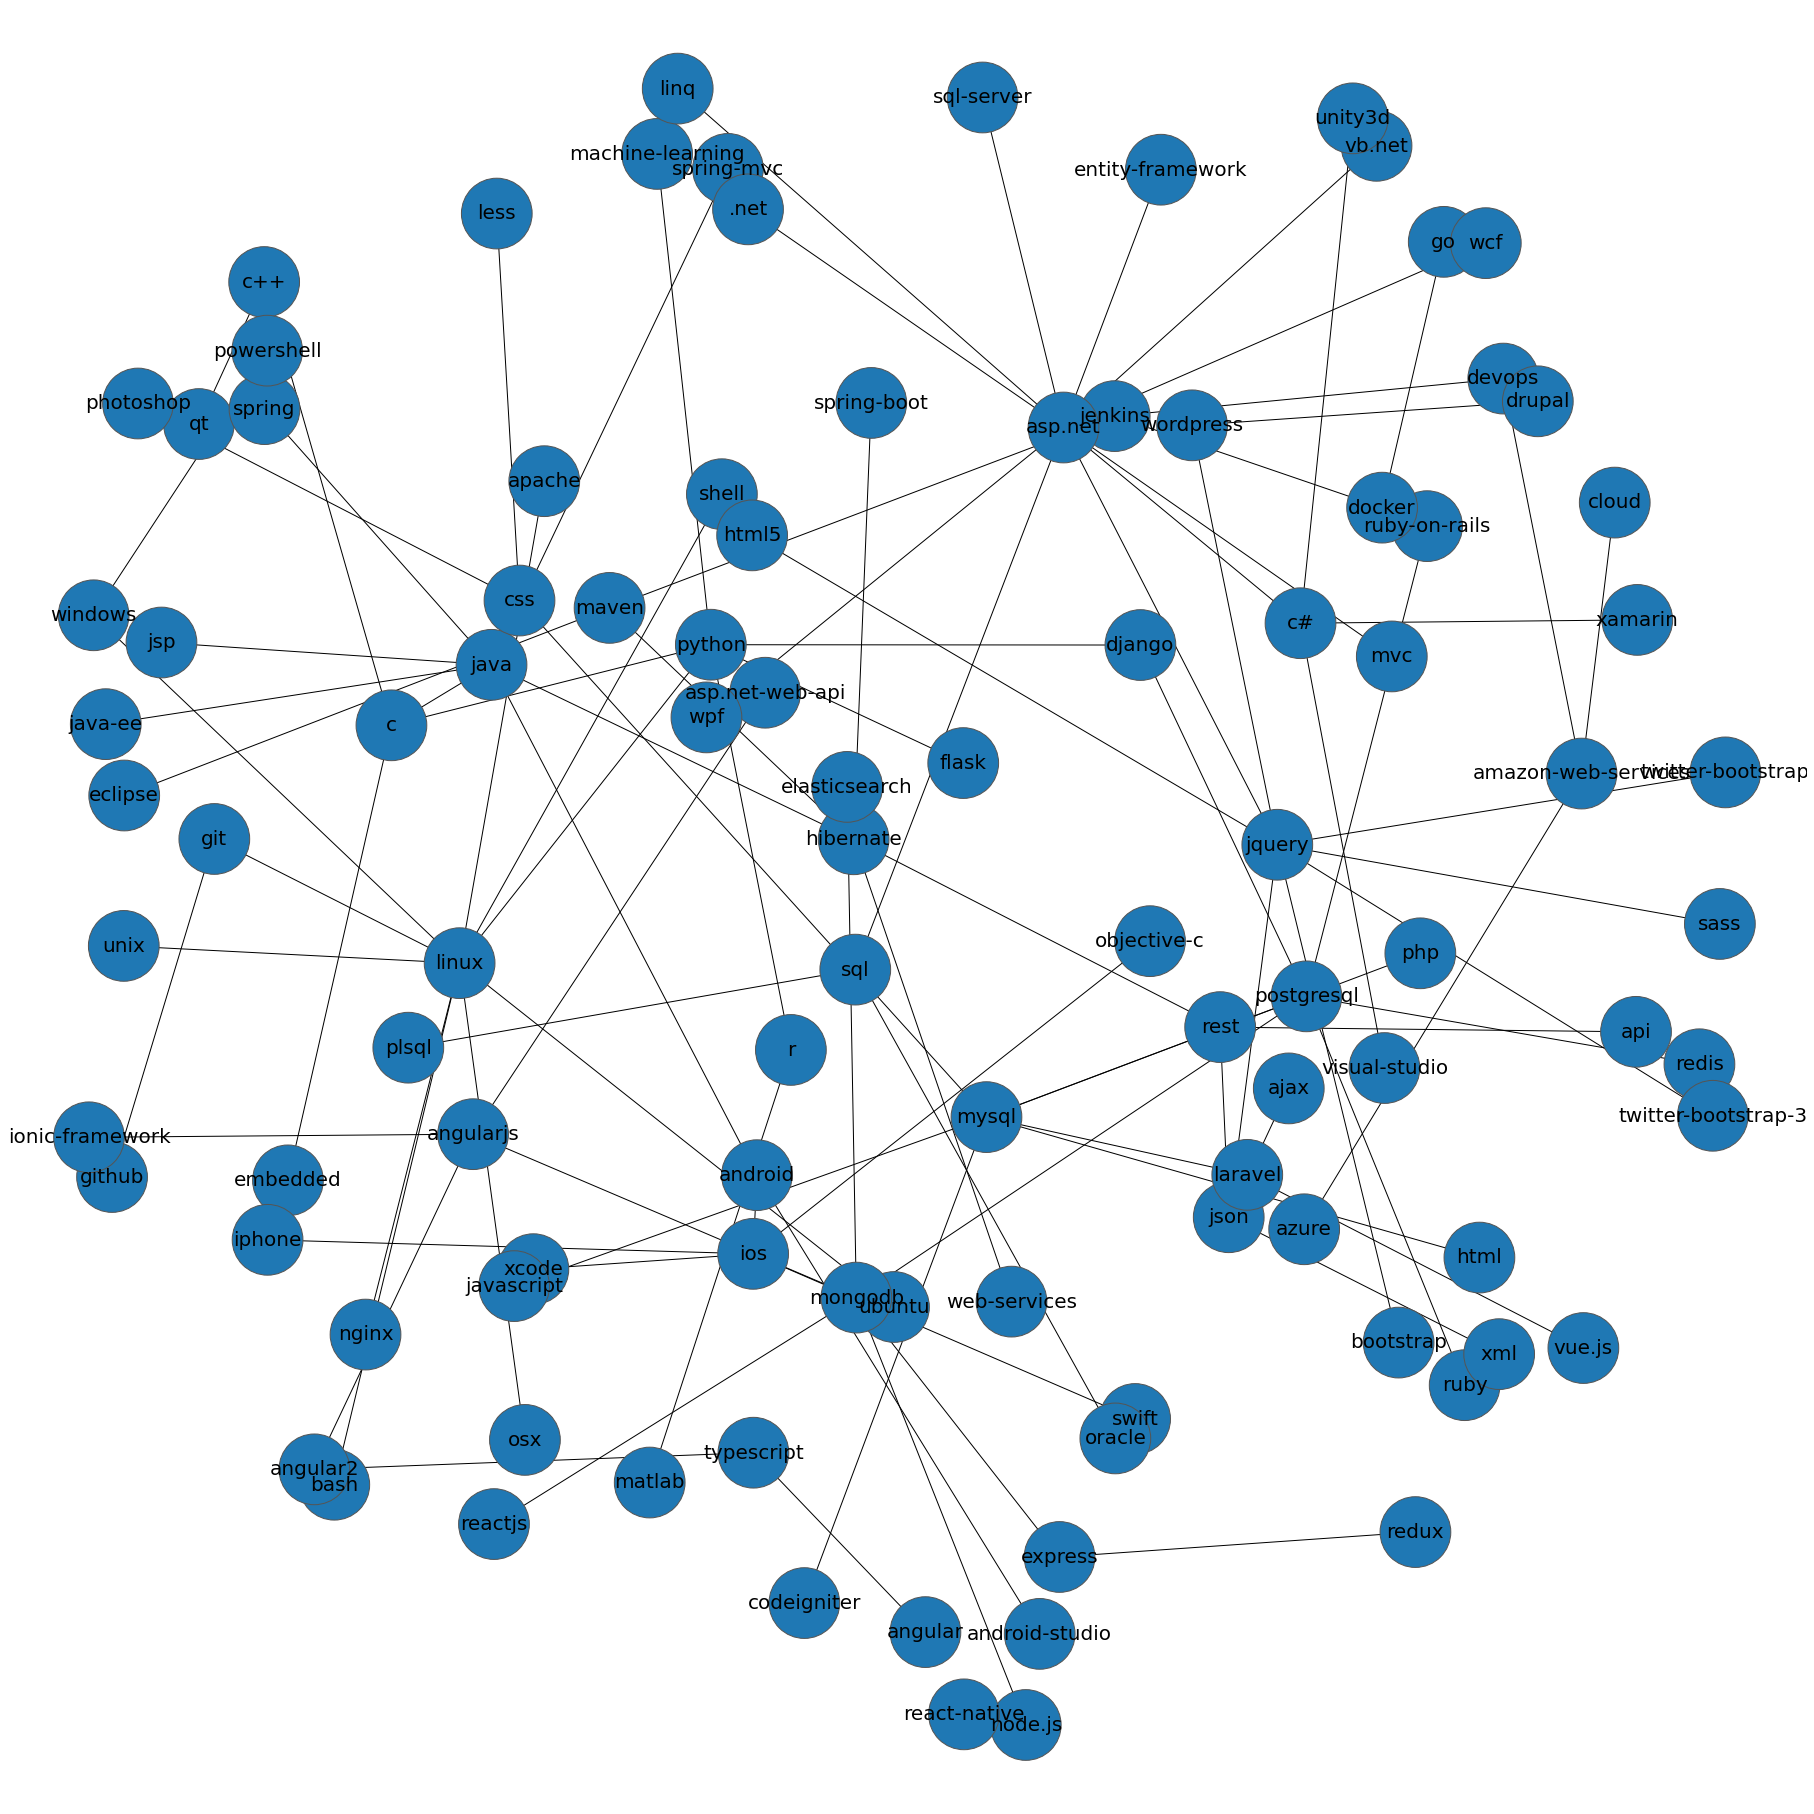

In [8]:
options = {
    'edge_color': '#000',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
    'font_size': 20,
}
plt.figure(figsize=(25,25))
sizes = [5000 for node in result_graph]
nx.draw(result_graph, node_size=sizes, pos=nx.spring_layout(result_graph, k=0.5, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()